In [1]:
import numpy as np
import pandas as pd

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./preproces_data.csv')
# chuyển cột 'time' sang dạng datetime
df['Ngày đăng tin'] = pd.to_datetime(df['Ngày đăng tin'], format='%Y/%m/%d')
df['Ngày hết hạn'] = pd.to_datetime(df['Ngày hết hạn'], format='%Y/%m/%d')

df.head()

,Giá,Diện tích,Số phòng ngủ,Số toilet,Địa chỉ nhà,Ngày đăng tin,Ngày hết hạn,Mã tin,Quận,Đường,Lượt xem
0,6.5,14.0,0,0,"Dự án The Prince Residence, Đường Nguyễn Văn T...",2023-06-23,2023-07-08,9122,Quận Phú Nhuận,Đường Nguyễn Văn Trỗi,35
1,8.0,68.0,2,2,"Dự án Q7 Saigon Riverside, Đường Đào Trí, Phườ...",2023-06-16,2023-07-01,8478,Quận 7,Đường Đào Trí,74
2,1.3,30.0,0,0,"Đường D5, Phường 25, Bình Thạnh, Hồ Chí Minh",2023-08-07,2023-08-22,11591,Quận Bình Thạnh,Đường D5,88
3,10.0,80.0,2,2,"Đường Tạ Quang Bửu, Phường 6, Quận 8, Hồ Chí Minh",2023-06-16,2023-07-01,8580,Quận 8,Đường Tạ Quang Bửu,48
4,35.0,120.0,5,4,"178A Đường Phan Đăng Lưu, Phường 3, Phú Nhuận,...",2023-03-16,2023-03-31,4467,Quận Phú Nhuận,Đường Phan Đăng Lưu,30


- Phải chuyển cột time về lại datetime64[ns] là do khi lưu kết quả xử lý df và khi đọc lại bằng csv các cột khác number sẽ tự lưu dưới dạng object


In [3]:
df.shape

(13289, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13289 entries, 0 to 13288
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Giá            13289 non-null  float64       
 1   Diện tích      13289 non-null  float64       
 2   Số phòng ngủ   13289 non-null  int64         
 3   Số toilet      13289 non-null  int64         
 4   Địa chỉ nhà    13289 non-null  object        
 5   Ngày đăng tin  13289 non-null  datetime64[ns]
 6   Ngày hết hạn   13289 non-null  datetime64[ns]
 7   Mã tin         13289 non-null  int64         
 8   Quận           13289 non-null  object        
 9   Đường          13289 non-null  object        
 10  Lượt xem       13289 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 1.1+ MB


## **Câu hỏi: Trực quan hoá dữ liệu các cột Number**
>+ **Mục đích: Hiểu rõ hơn về các giá trị Number trong data.**

/var/folders/7c/blssptt16fs931qs_zvg80c00000gn/T/ipykernel_9533/3658287342.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', linewidths=0.2)


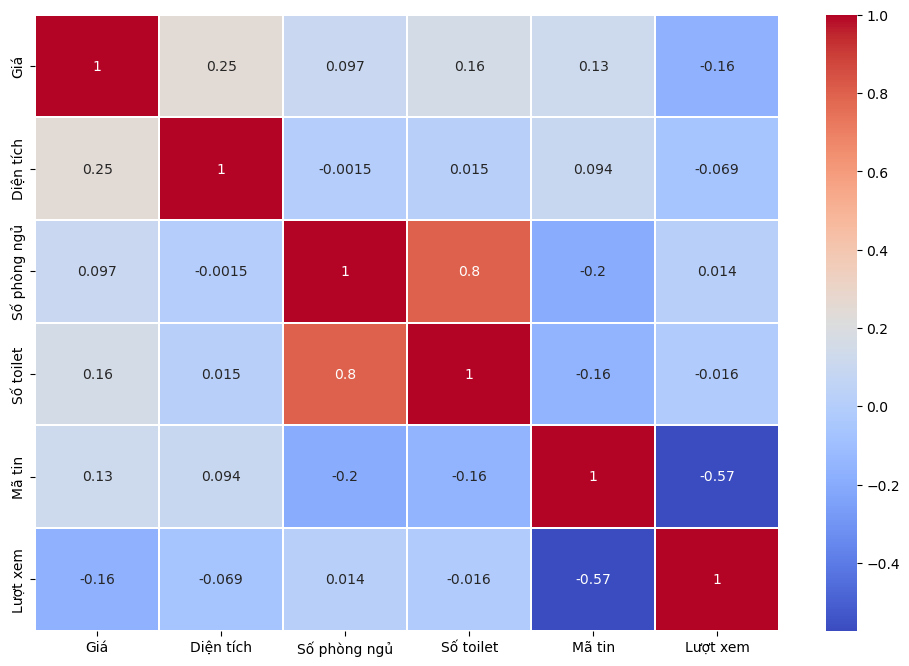

In [5]:
# xử lý data để tạo ra heatmap
df_heatmap = df.copy()

# Xoá các dòng có giá trị thiếu
df_heatmap = df_heatmap.dropna()

# vẽ heatmap
# Plotting heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.show()


## **Câu hỏi: Giữa "Giá" và "Diện tích" có mối quan hệ như thế nào và mức độ tương quan của chúng là bao nhiêu?**
>+ **Mục đích: Cho thấy mức độ tương quan của 2 giá trị này.**

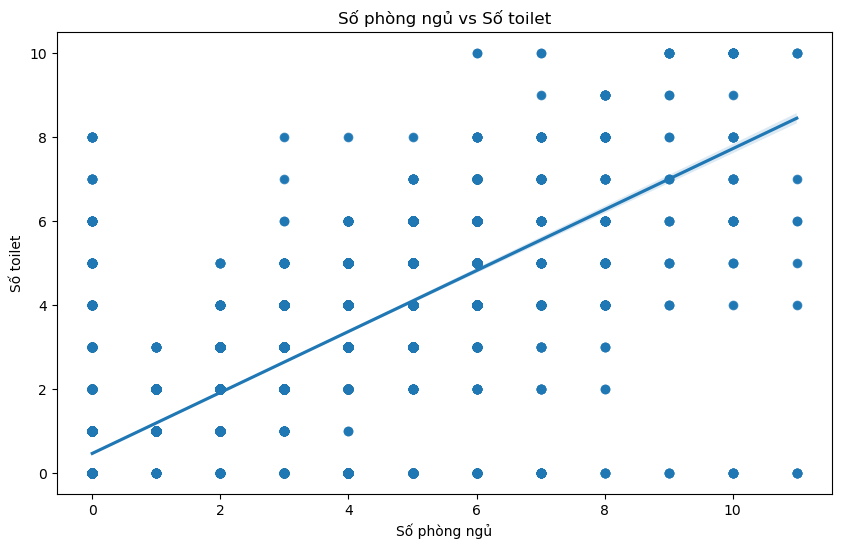

In [6]:
# Mối quan hệ giữa số phòng ngủ và số toilet
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_heatmap, x='Số phòng ngủ', y='Số toilet')
sns.regplot(x='Số phòng ngủ', y='Số toilet', data=df_heatmap)
plt.title('Số phòng ngủ vs Số toilet')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Số toilet')
plt.show()

## **Câu hỏi: Quận nào có số lượng bài đăng thuê nhà nhiều nhất trong dữ liệu?**
>+ **Mục đích: Để xác định khu vực có hoạt động thị trường thuê nhà sôi nổi nhất.**

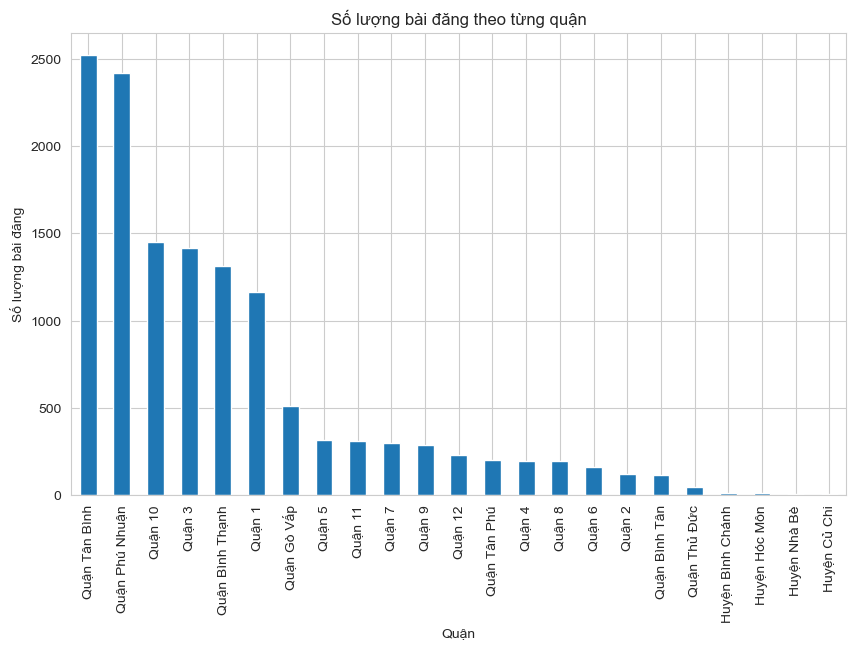

In [7]:
# Tính số lượng bài đăng theo từng quận
listings_per_district = df['Quận'].value_counts()

sns.set_style("whitegrid")
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
listings_per_district.plot(kind='bar')
plt.title('Số lượng bài đăng theo từng quận')
plt.xlabel('Quận')
plt.ylabel('Số lượng bài đăng')
plt.xticks(rotation=90)
plt.show()

>+ **Biểu đồ này giúp hiểu được sự phân bố của bất động sản trên thị trường theo vị trí địa lý và cho thấy các quận nào có hoạt động mua bán bất động sản sôi nổi nhất, thông qua số lượng tin đăng.**


## **Câu hỏi: Sự thay đổi và biến động về giá nhà tháng và năm? Có xu hướng tăng hay giảm như thế nào?**

>+ **Mục đích: Để hiểu rõ hơn về xu hướng thị trường và sự biến động giá cả theo thời gian.**

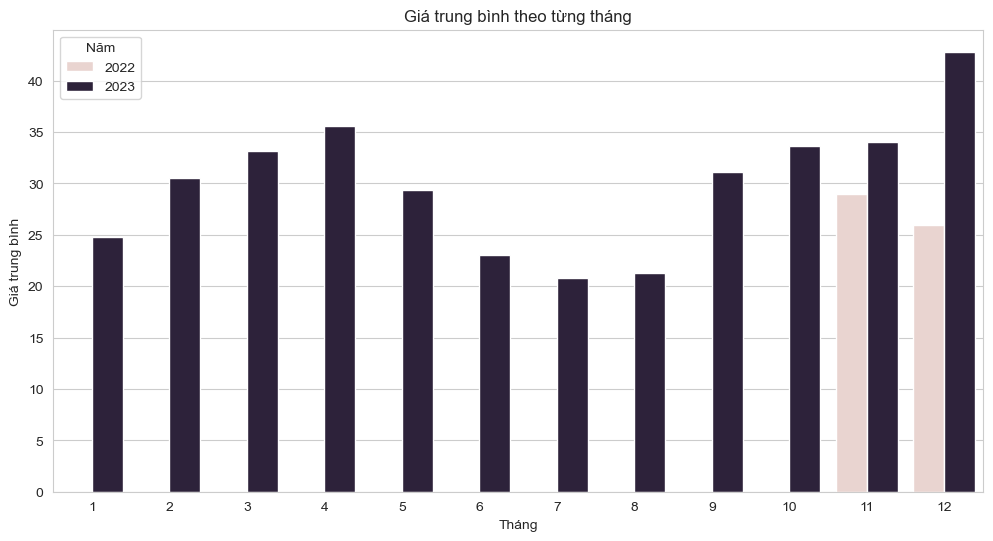

In [8]:
# Tính giá trung bình theo từng quận
df['Year'] = df['Ngày đăng tin'].dt.year
df['Month'] = df['Ngày đăng tin'].dt.month
price_trends = df.groupby(['Year', 'Month'])['Giá'].mean().reset_index()

sns.set_style("whitegrid")

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=price_trends, x='Month', y='Giá', hue='Year')
plt.title('Giá trung bình theo từng tháng')
plt.xlabel('Tháng')
plt.ylabel('Giá trung bình')
plt.legend(title='Năm')
plt.show()

>+ **Xu hướng giá qua các tháng: Có sự biến động rõ ràng về giá trung bình từ tháng 1 đến tháng 12.**

=> **Các tháng cuối năm, đặc biệt là tháng 11 và 12, cho thấy giá trung bình cao hơn đáng kể so với các tháng đầu năm.**
>+ **So sánh giữa các năm: Chỉ có dữ liệu cho tháng 11 và 12 của năm 2022 để so sánh với năm 2023. Trong hai tháng này, giá trung bình vào năm 2023 cao hơn đáng kể so với năm 2022.**
>+ **Tăng giá: Có một xu hướng tăng giá rõ ràng từ tháng 9 đến tháng 12 năm 2023, với mức giá trung bình tăng liên tục.**
>+ **Giá đầu năm: Trong những tháng đầu của năm 2023, giá trung bình dao động nhưng không thấy có xu hướng tăng giá đáng kể cho đến khoảng tháng 9.**
>+ **Tháng có giá cao nhất: Tháng 12 năm 2023 có giá trung bình cao nhất được thể hiện trên biểu đồ, điều này có thể gợi ý rằng có một sự tăng giá vào cuối năm.**

## **Câu hỏi: Giá nhà có cùng diện tích của từng quận khác nhau như thế nào?**

>+ **Mục đích: Thấy được sự chênh lệch của các nhà có cùng diện tích nhưng giá qua từng quận khác nhau.**
### => **Từ đó ta thấy được khu nào là khu vực vàng của thành phố Hồ Chí Minh** 

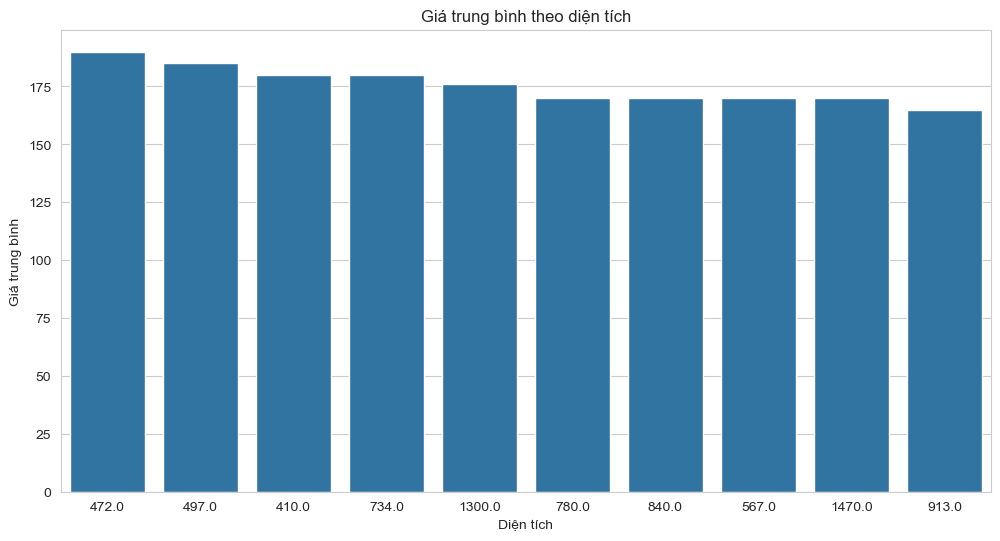

In [9]:
average_price_per_area = df.groupby('Diện tích')['Giá'].mean().reset_index()
# sort theo giá trung bình giảm dần
average_price_per_area = average_price_per_area.sort_values(by='Giá', ascending=False)

# Lấy 10 dòng đầu tiên
average_price_per_area = average_price_per_area.head(10)

# Lấy danh sách các diện tích để sắp xếp biểu đồ
area_order = average_price_per_area['Diện tích'].tolist()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_per_area, x='Diện tích', y='Giá', order=area_order)
plt.title('Giá trung bình theo diện tích')
plt.xlabel('Diện tích')
plt.ylabel('Giá trung bình')
plt.show()

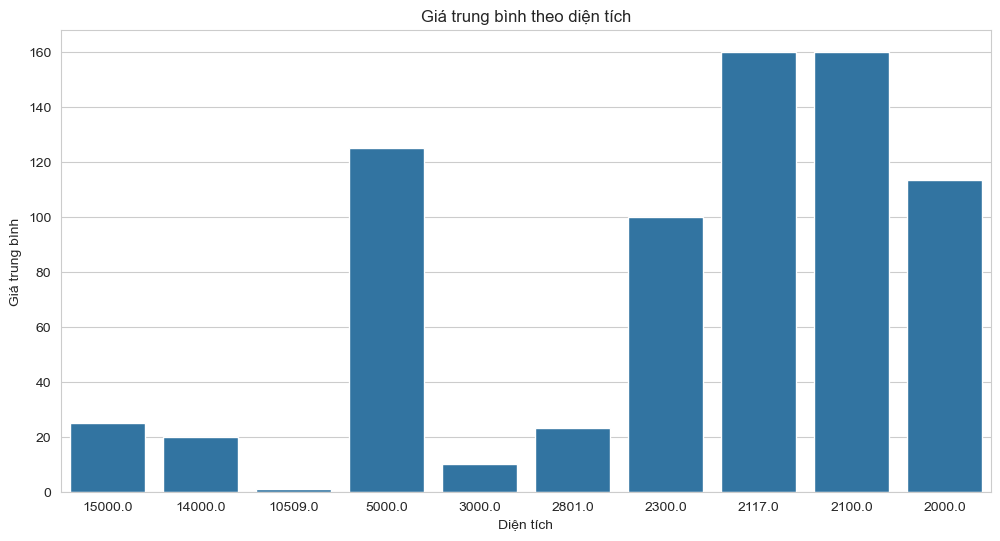

In [10]:
average_price_per_area = df.groupby('Diện tích')['Giá'].mean().reset_index()
# sort theo giá trung bình giảm dần
average_price_per_area = average_price_per_area.sort_values(by='Diện tích', ascending=False)

# Lấy 10 dòng đầu tiên
average_price_per_area = average_price_per_area.head(10)

# Lấy danh sách các diện tích để sắp xếp biểu đồ
area_order = average_price_per_area['Diện tích'].tolist()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_per_area, x='Diện tích', y='Giá', order=area_order)
plt.title('Giá trung bình theo diện tích')
plt.xlabel('Diện tích')
plt.ylabel('Giá trung bình')
plt.show()

## **Câu hỏi: Tại sao sự tương quan của Giá và Diện tích lại không được cao?**

>+ **Mục đích: Thấy rõ và hiểu hơn về dữ liệu của Giá và Diện tích tác động với nhau như thế nào.**

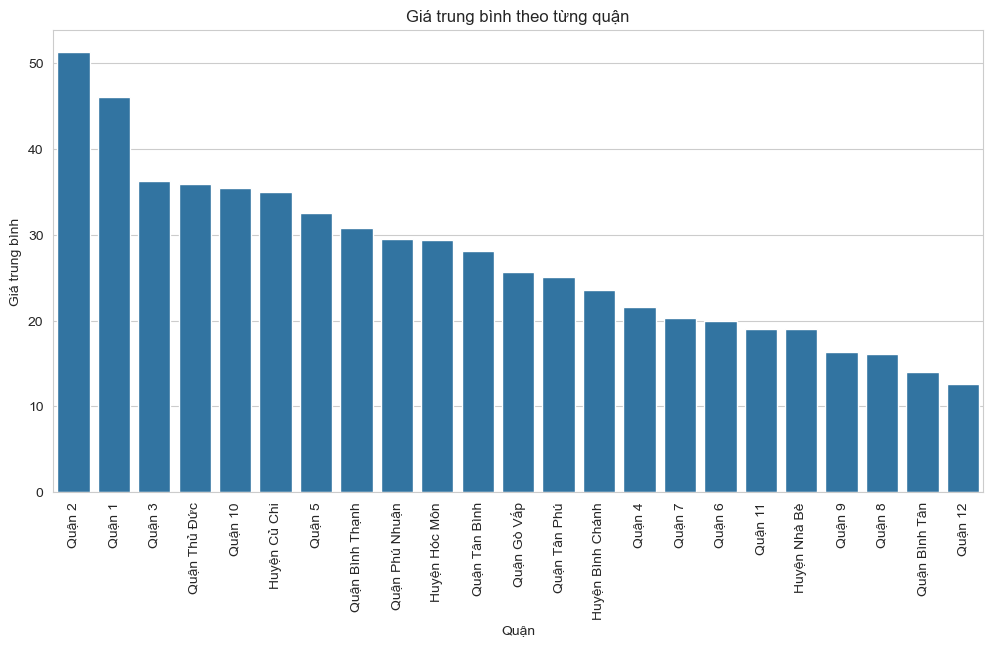

In [11]:
# Groupby theo Quận và tính giá trung bình
average_price_per_district = df.groupby('Quận')['Giá'].mean().reset_index()

# sắp xếp theo giá trung bình giảm dần
average_price_per_district = average_price_per_district.sort_values(by='Giá', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_per_district, x='Quận', y='Giá')
plt.title('Giá trung bình theo từng quận')
plt.xlabel('Quận')
plt.ylabel('Giá trung bình')
plt.xticks(rotation=90)
plt.show()

+ **Biểu đồ cột cho thấy sự khác biệt về giá trung bình giữa các quận, giúp nhận diện những quận có giá nhà cao nhất và thấp nhất.**

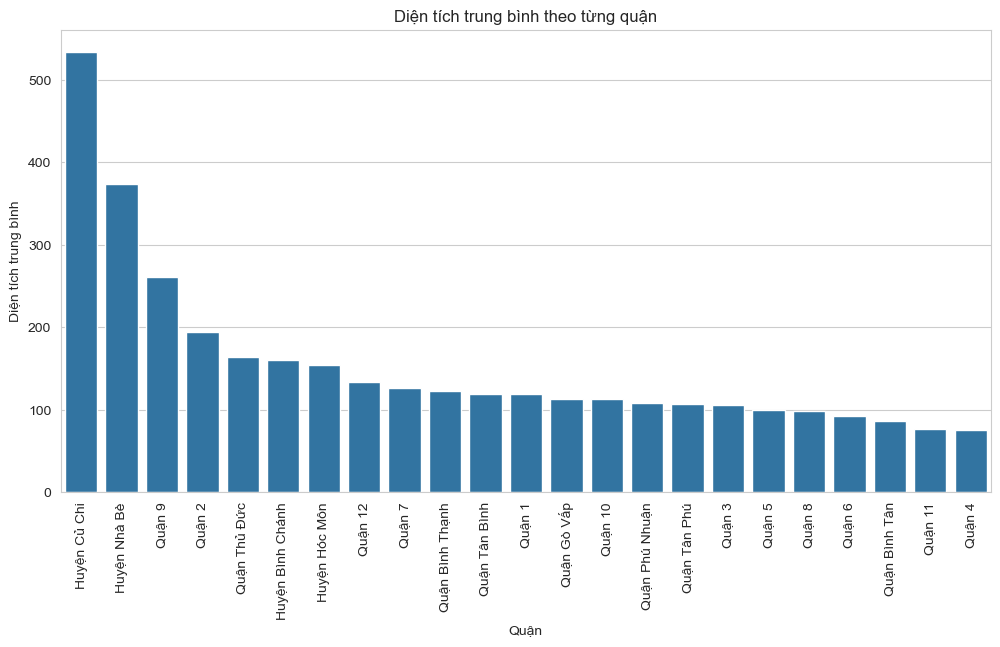

In [12]:
# Groupby theo Quận và tính diện tích trung bình
average_area_per_district = df.groupby('Quận')['Diện tích'].mean().reset_index()

# sắp xếp theo diện tích trung bình giảm dần
average_area_per_district = average_area_per_district.sort_values(by='Diện tích', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=average_area_per_district, x='Quận', y='Diện tích')
plt.title('Diện tích trung bình theo từng quận')
plt.xlabel('Quận')
plt.ylabel('Diện tích trung bình')
plt.xticks(rotation=90)
plt.show()

+ **Biểu đồ cột mô tả sự phân bố diện tích trung bình, giúp hiểu rõ về kích thước bình thường của nhà thuê trong các quận khác nhau.**

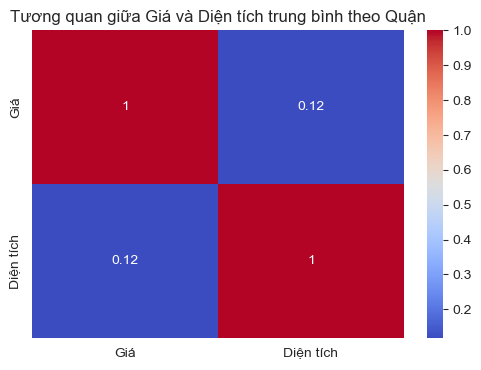

In [13]:
# Merge 2 DataFrame trên lại theo Quận thành 1 DataFrame mới
average_price_area_per_district = pd.merge(average_price_per_district, average_area_per_district, on='Quận')

# Tính correlation giữa giá và diện tích trung bình theo Quận
correlation_price_area = average_price_area_per_district[['Giá', 'Diện tích']].corr()

correlation_price_area

# Vẽ biểu đồ heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_price_area, annot=True, cmap='coolwarm')
plt.title('Tương quan giữa Giá và Diện tích trung bình theo Quận')
plt.show()

+ **Khi nhóm dữ liệu theo quận và tính giá trung bình, sự khác biệt về mặt địa lý có thể làm giảm sự biến động của giá và diện tích. Các quận có thể bao gồm cả khu vực đắt đỏ và khu vực giá cả phải chăng, làm mờ đi mối quan hệ giữa giá và diện tích là 0,25 giống heapmap ban đầu.**

+ **Sự đa dạng lớn về cả giá và diện tích của nhà thuê theo từng quận như câu trên đã trình bày cũng làm mờ đi mối quan hệ giữa giá và diện tích.**
